In [50]:
from geodude.parameter import Parameter
from geodude.utils import Paper, merge_LineStrings
import vsketch
import numpy as np
from scipy import stats
from shapely.geometry import (
    box, MultiLineString, Point, MultiPoint, Polygon, MultiPolygon, LineString)
from shapely import union_all
from shapely.affinity import translate, rotate, scale
from pathlib import Path
from dataclasses import dataclass
from fn.fn import Fn
from geodude import outputs_root
%load_ext autoreload
%autoreload 2

# make page
paper_size = '11x14 inches'
border:float=30
paper = Paper(paper_size)

drawbox = paper.get_drawbox(border)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
c0 = Point(0,0).buffer(100).boundary.buffer(20)

In [28]:
c1 = Point(80,0).buffer(100).boundary.buffer(20)

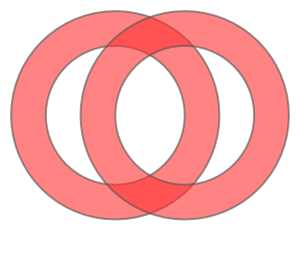

In [29]:
MultiPolygon([c0, c1])

In [30]:
def venn(polygon0, polygon1):
    # find the intersection of the two polygons
    intersection_polys = list(polygon0.intersection(polygon1).geoms)
    
    # find the difference of the two polygons
    difference0 = polygon0.difference(polygon1)
    difference1 = polygon1.difference(polygon0)
    return intersection_polys, difference0, difference1

What the thing below should prob actually do is map from a single intersection poly onto the set of difference polys

In [45]:
def randomly_assign_intersection_polys(intersection_polys, difference_polys):
    # randomly assign the intersection polys to either polygon0 or polygon1
    choices = np.random.choice(difference_polys, len(intersection_polys))
    assignments = {dp: [] for dp in difference_polys}
    for choice, intersection_poly in zip(choices, intersection_polys):
        assignments[choice].append(intersection_poly)
    return assignments

In [31]:
intersection_polys, difference0, difference1 = venn(c0, c1)

In [56]:
assignments = randomly_assign_intersection_polys(intersection_polys=intersection_polys, difference_polys=[difference0, difference1])
assignments

{<MULTIPOLYGON (((119.976 -0.981, 119.494 -10.783, 119.302 -12.736, 117.862 -...>: [<POLYGON ((85.53 -84.142, 84.142 -85.53, 76.871 -92.12, 75.353 -93.365, 67.4...>],
 <MULTIPOLYGON (((199.976 -0.981, 199.494 -10.783, 199.302 -12.736, 197.862 -...>: [<POLYGON ((45.006 111.219, 46.819 110.468, 55.691 106.272, 57.422 105.347, 6...>]}

In [51]:
def join_assignments(assignments):
    fused = []
    for k, v in assignments.items():
        fused.append(k.union(union_all(v)))
    return fused

In [57]:
fused = join_assignments(assignments)

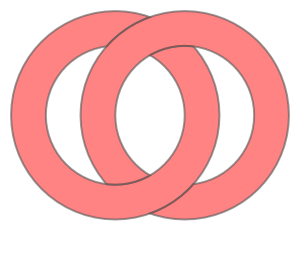

In [58]:
MultiPolygon(fused)

In [35]:
f0 = difference0.union(intersection_polys[0])

In [36]:
f1 = difference1.union(intersection_polys[1])

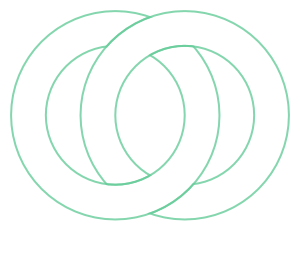

In [38]:
MultiPolygon([f0, f1]).boundary

In [16]:
c1_minus_c2 = c1.difference(c2)
c2_minus_c1 = c2.difference(c1)
intersection_polys = list(c1.intersection(c2).geoms)

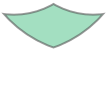

In [18]:
intersection_polys[0]